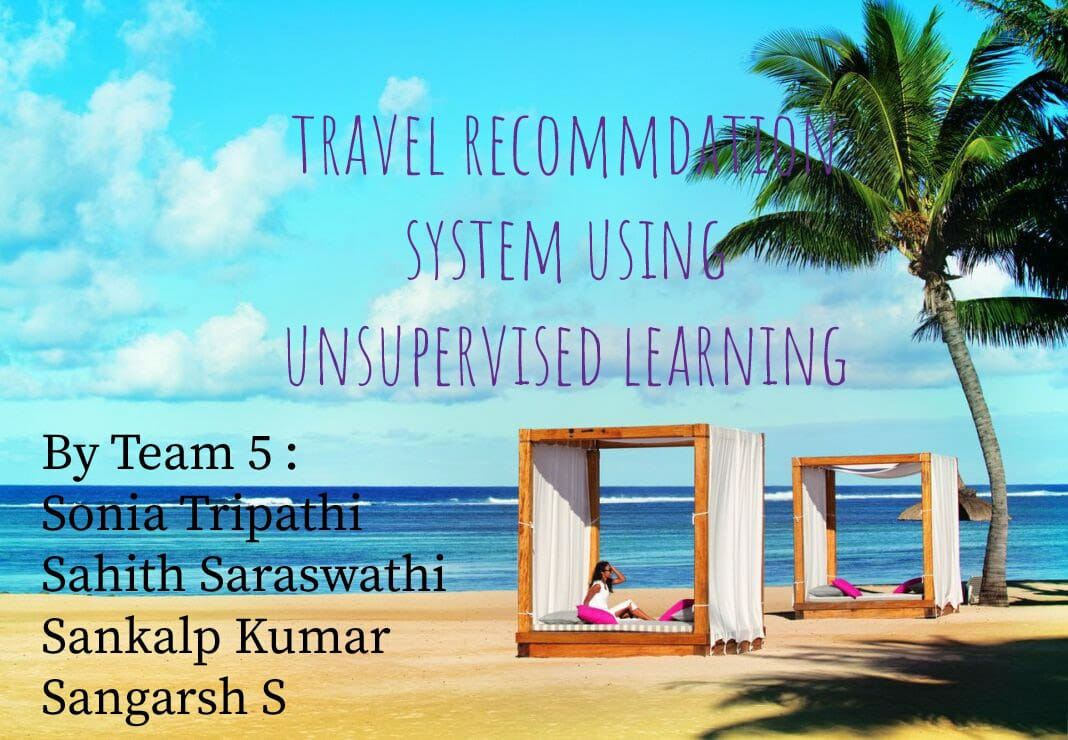

### PROBLEM STATEMENT

- Nowadays people love travelling to different places based on their interest with their family and friends. This project mainly focuses on the application of the Travel recommendation system and cluster analysis.
- Based on the cluster analysis, Companies can focus on different clusters to increase their Revenue.
- We chose a dataset  from kaggle which has information on the various ratings of users on various categories across the Europe to specify the group of users based on their similarity of their interest using different cluster analysis.

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
plt.rcParams['figure.figsize'] = [15,8]

In [ ]:
df_review = pd.read_csv('../input/travel-review-rating-dataset/google_review_ratings.csv')
df_review.head(17)

In [ ]:
# Renaming the columns for better understanding
column_names = ['User', 'churches', 'resorts', 'beaches', 'parks', 'theatres', 'museums', 'malls', 'zoo', 'restaurants', 'pubs_bars', 'local_services', 'burger_pizza_shops', 'hotels_other_lodgings', 'juice_bars', 'art_galleries', 'dance_clubs', 'swimming_pools', 'gyms', 'bakeries', 'beauty_spas', 'cafes', 'view_points', 'monuments', 'gardens','Unnamed: 25']
df_review.columns = column_names

In [ ]:
df_review.head(17)

# EDA

In [ ]:
# checking the dimensions of the data 
df_review.shape

#### Interpretation :  The dataset has 5456 observations and 26 features

In [ ]:
# checking for the datatypes 
df_review.dtypes

- **There are two categorical variable and 24numeric features. One of the numeric feature(local_services) is identified as object, so let's convert it.**

In [ ]:
df_review['local_services'].value_counts()

In [ ]:
df_review['local_services'][df_review['local_services'].index == 2712]

In [ ]:
df_review['local_services'][df_review['local_services'] == '2\t2.']

In [ ]:
df_review['local_services'] = df_review['local_services'].replace('2\t2.',2)

In [ ]:
df_review['local_services'] = pd.to_numeric(df_review['local_services'])

In [ ]:
df_review.dtypes

- **All the variables are indentified correctly now.**

In [ ]:
df_review.describe(include='all')

-**There are 5456 unique values for the feature User which is insignificant and can be removed.**

In [ ]:
#checking for duplicates in dataset
df_review[df_review.duplicated()]

#### Interpretation : No duplicate values in our dataset

In [ ]:
# Checking for missing values

In [ ]:
Total = df_review.isnull().sum().sort_values(ascending=False)          

Percent = (df_review.isnull().sum()*100/df_review.isnull().count()).sort_values(ascending=False)   

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

#### Interpretation : There is only 0.01 % of missing values for gardens and burger_pizza_shops. However there are around 99.9 % of missing values for the variable Unnamed: 25 and hence  can be removed completely.

In [ ]:
# Missing value treatment

In [ ]:
# Removing insificicant variable
df_review.drop('Unnamed: 25',axis=1,inplace=True)
df_review.head()

In [ ]:
df_review['gardens'].mean()

In [ ]:
df_review['gardens'].replace(np.nan,df_review['gardens'].mean(),inplace=True)

In [ ]:
df_review['burger_pizza_shops'].mean()

In [ ]:
df_review['burger_pizza_shops'].replace(np.nan,df_review['burger_pizza_shops'].mean(),inplace=True)

In [ ]:
Total = df_review.isnull().sum().sort_values(ascending=False)          

Percent = (df_review.isnull().sum()*100/df_review.isnull().count()).sort_values(ascending=False)   

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

#### Interpretation : Missing values are been treated.

In [ ]:
df = df_review.copy()

In [ ]:
df_review = df_review.drop(['User'],1)

In [ ]:
# Checking for outliers and treating them 

In [ ]:
fig, ax = plt.subplots(nrows = 8, ncols = 3, figsize=(15, 6))

plt.tight_layout()

for variable, subplot in zip(df_review.columns, ax.flatten()):
    
 
    sns.boxplot(df_review[variable], ax = subplot)

# display the plot
plt.show()

- #### Interpretation:There are many outliers in Dataset and can be removed.

In [ ]:
Q1 = df_review[['churches','resorts','beaches','burger_pizza_shops','hotels_other_lodgings','dance_clubs','swimming_pools','gyms','bakeries','beauty_spas','cafes','view_points','monuments','gardens']].quantile(0.25)

Q3 = df_review[['churches','resorts','beaches','burger_pizza_shops','hotels_other_lodgings','dance_clubs','swimming_pools','gyms','bakeries','beauty_spas','cafes','view_points','monuments','gardens']].quantile(0.75)

IQR = Q3-Q1

IQR

In [ ]:
df_iqr = df_review[~((df_review < (Q1 - 1.5 * IQR)) | (df_review > (Q3 + 1.5 * IQR))).any(axis=1)]
df_iqr.shape

#### Interpretation: Let consider the data with oulier values, as the number of rows are reducing very much after removing outliers.

In [ ]:
df_popularity_table = pd.DataFrame(df_review.mean(),columns=['Average Rating'])
df_popularity_table['TotalRatingCount'] = df_review.astype(bool).sum(axis=0).values

In [ ]:
bar = df_popularity_table.sort_values(by=['TotalRatingCount'],ascending=True)

In [ ]:
df_popularity_table

In [ ]:
# Barplot based on total number of rating
plt.figure(figsize=(15,8))
sns.barplot(bar.index,bar.TotalRatingCount,color= 'blue',orient='v')
plt.xlabel('Number of Rating')
plt.xticks(rotation=90)
plt.show()

#### Interpretation: Bakeries has least number of reviews.

In [ ]:
bar = df_popularity_table.sort_values(by=['Average Rating'],ascending=True)

In [ ]:
# Barplot based on average rating
plt.figure(figsize=(15,8))
plt.barh(bar.index, bar['Average Rating'])
plt.xlabel('Average Rating')

#### Interpretation: Malls are has highest rating and Gyms has least rating,so people prefer mall compared to gyms.

In [ ]:
# Overall Rating Distribution
df_transform = pd.melt(df_review,value_vars=['churches', 'resorts', 'beaches', 'parks', 'theatres', 'museums', 'malls', 'zoo', 'restaurants', 'pubs_bars', 'local_services', 'burger_pizza_shops', 'hotels_other_lodgings', 'juice_bars', 'art_galleries', 'dance_clubs', 'swimming_pools', 'gyms', 'bakeries', 'beauty_spas', 'cafes', 'view_points', 'monuments', 'gardens'])

fig = plt.figure(figsize = (15,7))
g = sns.violinplot(x='variable',y='value',data=df_transform,palette = 'Set3')
g.set_xticklabels(g.get_xticklabels(),rotation=90);
g.set_title(f'Overall Rating Distribution',y=1.05,fontsize=20)
g.set_xlabel("")
g.set_ylabel("Rating",labelpad = 20)
fig.tight_layout(pad = 0.5)

#### Interpretation:
- Overall rating are lying between 0.5 to 5 stars
- Some attractions have wide-range of rating distribution (suchas pubs/bars, restaurants,malls) since they are common attraction point where most of tourist must visit
- On the other hand, some attractions such as gyms, bakeries, swimming pools,beauty_spas have relatively low rating. Since most of the users might not visit often to all these places.
- Since we don't have enough information about attraction itself or descriptive user reivews, In this notebook we'll focus on segmenting user into different cluster based on their preferences

In [ ]:
# Scaling the data using Standard scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df_scaled = ss.fit_transform(df_review)
df_scaled = pd.DataFrame(df_scaled,columns=df_review.columns)
df_scaled.shape

In [ ]:
df_scaled.head()

## MODEL1-   HIERARCHICAL CLUSTERING

In [ ]:
from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree

In [ ]:
fig, axes = plt.subplots(2, 3,  figsize=(25,10))

mergings = linkage(df_scaled,method='complete',metric='euclidean')
dendrogram(mergings,truncate_mode='lastp',ax=axes[0,0])
axes[0,0].set_title('Complete')

mergings = linkage(df_scaled,method='average',metric='euclidean')
dendrogram(mergings,truncate_mode='lastp',ax=axes[0,1])
axes[0,1].set_title('Average')

mergings = linkage(df_scaled,method='centroid',metric='euclidean')
dendrogram(mergings,truncate_mode='lastp',ax=axes[0,2])
axes[0,2].set_title('Centroid')

mergings = linkage(df_scaled,method='single',metric='euclidean')
dendrogram(mergings,truncate_mode='lastp',ax=axes[1,0])
axes[1,0].set_title('Single')

mergings = linkage(df_scaled,method='ward',metric='euclidean')
dendrogram(mergings,truncate_mode='lastp',ax=axes[1,1])
axes[1,1].set_title('Ward')

mergings = linkage(df_scaled,method='weighted',metric='euclidean')
dendrogram(mergings,truncate_mode='lastp',ax=axes[1,2])
axes[1,2].set_title('Weighted')

plt.show()

#### Interpretation :
- **Complete gives lot of cluster.**
- **Single,Centroid and Weighted has overlap.**
- **Ward as Method number cluster will be 5.**

In [ ]:
mergings = linkage(df_scaled,method='ward',metric='euclidean')
clustercut = pd.Series(cut_tree(mergings,n_clusters=5).reshape(-1,))
clustercut.value_counts()

In [ ]:
# Grouping Category 

df_category_reviews = pd.DataFrame(columns = ['Entertainment', 'Food_Service', 'Accommodation', 'Historical_Place', 'Scenic_Beauty', 'Additional_Services','Cluster'])
df_category_reviews['Entertainment'] = (df_review['theatres']+df_review['dance_clubs']+df_review['malls'])/15
df_category_reviews['Food_Service'] = (df_review['restaurants']+df_review['pubs_bars']+df_review['burger_pizza_shops']+df_review['juice_bars']+df_review['bakeries']+df_review['cafes'])/30
df_category_reviews['Accommodation'] = (df_review['hotels_other_lodgings']+df_review['resorts'])/10
df_category_reviews['Historical_Place'] = (df_review['churches']+df_review['museums']+ df_review['art_galleries']+df_review['monuments'])/20
df_category_reviews['Scenic_Beauty'] = (df_review['beaches']+df_review['parks']+ df_review['zoo']+df_review['view_points']+df_review['gardens'])/25
df_category_reviews['Additional_Services'] = (df_review['local_services']+df_review['swimming_pools']+ df_review['gyms']+df_review['beauty_spas'])/20
df_category_reviews['Cluster'] = clustercut

In [ ]:
# Profiling
df_category_reviews.groupby('Cluster').mean()

In [ ]:
df_category_reviews.groupby('Cluster').mean().plot.bar()
plt.legend(loc='best')
plt.show()

#### Interpretation:
- Cluster 0 : These People dont like additional service and most perfered thing is entertainment.
- Cluster 1 : These People like Food service and entertainment more and have less interest in Additional Service
- Cluster 2 : These People like Scenic_Beauty like beaches,parks,zoo,view_points and Entertainment and have less interest in Additional Service.
- Cluster 3 : These People like Scenic_Beauty and Historical places and have least interest in Additional Service.However, Additional Service is more as compared to other two clusters.
- Cluster 4 : These People like Food Service and Accommodation and have least interest in Scenic_Beauty.

## MODEL2- KMEANS CLUSTERING

In [ ]:
from sklearn.cluster import KMeans

#### Optimal Value of K Using Elbow Plot

In [ ]:
wcss  = []
for i in range(1,21):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(range(1,21), wcss,marker='*')
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)
plt.grid(True)
plt.show()

#### Interpretation:
- **Best k=5 where eblow is formed**

#### Optimal Value of K Using Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples
n_clusters = [2, 3, 4, 5, 6]
sscore= []

for K in n_clusters:
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, predict, random_state= 10)
    print ("For {} clusters the silhouette score is {}".format(K, score))
    sscore.append(score)


In [ ]:
plt.figure(figsize=(15,8))
plt.plot(n_clusters,sscore,'r')
plt.xlabel('Number of Cluster')
plt.ylabel('Average Sihouette Score')
plt.grid(True)
plt.show()

In [ ]:
# visualize the silhoutte scores

In [ ]:
import matplotlib.cm as cm
n_clusters = [2, 3, 4, 5, 6]

X = np.array(df_scaled)

for K in n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    model = KMeans(n_clusters = K, random_state = 10)
    cluster_labels = model.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(K):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / K)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10 
    ax1.set_title("Silhouette Plot")
    ax1.set_xlabel("Silhouette coefficient")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8])
    colors = cm.nipy_spectral(cluster_labels.astype(float) / K)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')
    centers = model.cluster_centers_
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    ax2.set_title("Clusters")
    ax2.set_xlabel("Spending Score")
    plt.suptitle(("Silhouette Analysis for K-Means Clustering with n_clusters = %d" % K), fontsize=14, 
                 fontweight='bold')
plt.show()

#### Interpretation:
- **Cluster 5 has less dense MissClassification compared to others.**

In [ ]:
kmeans = KMeans(n_clusters=5,random_state=4)
kmeans.fit(df_scaled)

In [ ]:
# value-counts for the cluster
cl = pd.DataFrame(kmeans.labels_,columns=['Cluster'])
cl.value_counts()

In [ ]:
df_final = df_review.copy()
df_final = pd.concat([df_final,cl],1)

In [ ]:
df_long = pd.melt(df_final, "Cluster", var_name="categories")

fig = plt.figure(figsize = (30,10))
for i in range(len(df_long.Cluster.unique())):
    plt.subplot(1,len(df_long.Cluster.unique()),i+1)
    g = sns.barplot(y='categories',x='value',data=df_long[df_long['Cluster']==i],palette='Set3',ci=None,estimator=np.median)
    g.set_title(f'Review distribution of Cluster#{i}',y=1.02,fontsize=20)
    g.set_ylabel('Categories')
    g.set_xlim(0,5)
fig.tight_layout(pad=0.5)

**Interpretation:**<br>
-**Cluster0 are people who like most of the category as similar.**<br>
-**Cluster1 are people who like museums,parks,malls and theatres.**<br>
-**Cluster2 are people who like malls and restaurants.**<br>
-**Cluster3 are people who like burger shop,hotels and art galleries.**<br>
-**Cluster4 are people who like gyms,swimming pool and dance_clubs.**<br>


## PCA

In [ ]:
sns.heatmap(df_review.corr()[df_review.corr() >= 0.6],annot=True)
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df_scaled)

In [ ]:
pca.explained_variance_  # To get the eigen values

In [ ]:
plt.bar(range(1,25),pca.explained_variance_)
plt.grid(True)
plt.show()

In [ ]:
pca.explained_variance_ratio_  # proportion accounted

In [ ]:
plt.plot(range(1,25),np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Component index')
plt.ylabel('cummulative proportion')
plt.show()

**Interpretation:**
- **The above output shows that 21 components are accounting for >=95 % of variation in the data.**

In [ ]:
pca = PCA(0.95)
pca.fit(df_scaled)

In [ ]:
pca.explained_variance_

In [ ]:
pca.components_   # this is the eigen vector

In [ ]:
pca.components_.shape

**Interpretation:**
- **As the Feature has just decreased to 24 to 21,Not Building a Model with PCA Components.**

# MODEL3 -DBSCAN


In [ ]:
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=48)
nn = nn.fit(df_scaled)
distances,indices= nn.kneighbors(df_scaled)

In [ ]:
plt.figure(figsize=(10,8))
distances = np.sort(distances,axis=0)
distances = distances[:,1]
plt.xlabel('indices')
plt.ylabel('eps')
plt.plot(distances)
plt.axhline(1.5,color='r')
plt.grid(True)
plt.show()

#### Interpretation:
- **Best eps=1.5 where eblow is formed**

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1.5,min_samples=48) 
dbscan.fit(df_scaled)

In [ ]:
lbl = pd.DataFrame(dbscan.labels_,columns=['Cluster'])

In [ ]:
lbl.value_counts()

#### Interpretation:
- Lot of outlier present in that data denoted by -1.

# Recommendation System

### Approach1: Popularity Based Recommendation

In [ ]:
df_review.mean()

In [ ]:
df_popularity_table = pd.DataFrame(df_review.mean(),columns=['Average Rating'])
df_popularity_table.head()

In [ ]:
df_popularity_table['TotalRatingCount'] = df_review.astype(bool).sum(axis=0).values
df_popularity_table

In [ ]:
df_popularity_table.sort_values(by=['Average Rating','TotalRatingCount'],ascending=False).head()

**Interpretation:**
- **For a New Visitor to Europe, Top 5 place he/she can visits are malls,restaurants,theatres,museums,pubs_bars.**

## Collaborative Filtering Recommendation System.

### Approach 2: Matrix Based

In [ ]:
from surprise import Dataset,Reader
from surprise import SVDpp

In [ ]:
df_coll_filt_data = df.set_index('User', append=True).stack().reset_index().rename(columns={0:'rating', 'level_2':'Category'}).drop('level_0',1)
df_coll_filt_data .head(30)

In [ ]:
# dataset info
df_coll_filt_data.info()

In [ ]:
reader = Reader(rating_scale=(1,5))  # rating scale

In [ ]:
rating_data = Dataset.load_from_df(df_coll_filt_data[['User','Category','rating']],reader)

In [ ]:
trainsetfull = rating_data.build_full_trainset()
print('Number of user:',trainsetfull.n_users)
print('Number of items:',trainsetfull.n_items)

In [ ]:
algo = SVDpp(random_state=4)  
algo.fit(trainsetfull)

In [ ]:
item_id = df_coll_filt_data['Category'].unique()
item_id

In [ ]:
test_set = [['User 50',iid,4] for iid in item_id]
test_set

In [ ]:
pred = algo.test(test_set)

In [ ]:
rec = pd.DataFrame(pred).sort_values(by='est',ascending=False)
rec.head(5)

**Interpretation:**
- **For a User Number 50, Top 5 place he/she can visits are viewpoints,beaches,monuments,resorts,churches.**

### Evaluating the Model

In [ ]:
from surprise.model_selection import train_test_split
[trainset,testset] = train_test_split(rating_data,test_size=0.3,random_state=4)
algo = SVDpp(random_state=4)
algo.fit(trainset)

In [ ]:
test_pred= algo.test(testset)

In [ ]:
tp = pd.DataFrame(test_pred)
tp.head()

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(tp['r_ui'],tp['est']))
print('RMSE on Test',rmse)

### Conclusion 

- We used cluster analysis such as k-means,hierarichal and DBscan algorithms to find cluster which user belongs to based on ratings provided.
- we have done the recommondation systems such as popularity and collabarative filtering
- Evaluation of model is done throught finding rmse of test data

###                                                                             THANK YOU